In [1]:
# !unzip mmwave-data.zip

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import special as sp
from scipy.stats import gaussian_kde
from scipy.io import loadmat
from sklearn.neighbors import KernelDensity
from scipy import special as sp
import warnings
warnings.filterwarnings('ignore')

# Data Load

## Small Scale Fading Data 

In [3]:
def SSF_mmdata_dB(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def SSF_mmdata_linear(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9


######################
#### LOAD PATH AB ####
######################
SSF_pathAB_dB = pd.DataFrame()
SSF_pathAB_dB['AP1'], SSF_pathAB_dB['AP2'], SSF_pathAB_dB['AP3'],\
 SSF_pathAB_dB['AP4'], SSF_pathAB_dB['AP5'], SSF_pathAB_dB['AP6'],\
  SSF_pathAB_dB['AP7'], SSF_pathAB_dB['AP8'], SSF_pathAB_dB['AP9'] = SSF_mmdata_dB('AB')

SSF_pathAB_linear = pd.DataFrame()
SSF_pathAB_linear['AP1'], SSF_pathAB_linear['AP2'], SSF_pathAB_linear['AP3'],\
 SSF_pathAB_linear['AP4'], SSF_pathAB_linear['AP5'], SSF_pathAB_linear['AP6'],\
  SSF_pathAB_linear['AP7'], SSF_pathAB_linear['AP8'], SSF_pathAB_linear['AP9'] = SSF_mmdata_linear('AB')


######################
#### LOAD PATH BA ####
######################
SSF_pathBA_dB = pd.DataFrame()
SSF_pathBA_dB['AP1'], SSF_pathBA_dB['AP2'], SSF_pathBA_dB['AP3'],\
 SSF_pathBA_dB['AP4'], SSF_pathBA_dB['AP5'], SSF_pathBA_dB['AP6'],\
  SSF_pathBA_dB['AP7'], SSF_pathBA_dB['AP8'], SSF_pathBA_dB['AP9'] = SSF_mmdata_dB('BA')

SSF_pathBA_linear = pd.DataFrame()
SSF_pathBA_linear['AP1'], SSF_pathBA_linear['AP2'], SSF_pathBA_linear['AP3'],\
 SSF_pathBA_linear['AP4'], SSF_pathBA_linear['AP5'], SSF_pathBA_linear['AP6'],\
  SSF_pathBA_linear['AP7'], SSF_pathBA_linear['AP8'], SSF_pathBA_linear['AP9'] = SSF_mmdata_linear('BA')

##########################
#### PRINT STATISTICS ####
##########################
print('Path AB (dB) Statistics:')
display(SSF_pathAB_dB.describe())
print('Path AB (linear) Statistics:')
display(SSF_pathAB_linear.describe())
print('Path BA (dB) Statistics:')
display(SSF_pathBA_dB.describe())
print('Path BA (linear) Statistics:')
display(SSF_pathBA_linear.describe())


Path AB (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,-0.696300,-0.706977,-0.950157,-0.649444,-0.671172,-1.023778,-0.975409,-0.890574,-1.067207
std,3.827021,3.843941,4.345763,3.608783,3.657521,4.609185,4.428430,4.217900,4.628232
min,-28.257000,-26.160000,-30.613000,-26.990000,-29.916000,-29.998000,-27.744000,-24.949000,-26.882000
25%,-2.003200,-2.086100,-2.829525,-1.817875,-1.925500,-3.061450,-3.032250,-2.724975,-3.256600
50%,0.017756,-0.086271,-0.148310,-0.047697,-0.012861,-0.149310,-0.141100,-0.180765,-0.253520
75%,1.553000,1.488500,1.844975,1.316550,1.431450,1.974400,1.982550,1.821300,2.012050
max,8.209900,9.598300,9.200100,10.698000,9.334600,8.803300,9.140200,9.140100,9.516400


Path AB (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,0.998078,0.999170,0.994459,0.996652,0.996119,0.998034,0.996456,0.996790,0.996149
std,0.346952,0.361394,0.406651,0.340052,0.342458,0.428794,0.417400,0.402380,0.439500
min,0.038648,0.049204,0.029467,0.044717,0.031928,0.031630,0.041001,0.056568,0.045280
25%,0.794040,0.786490,0.721980,0.811160,0.801170,0.702955,0.705320,0.730723,0.687333
50%,1.002000,0.990120,0.983070,0.994525,0.998520,0.982960,0.983890,0.979400,0.971230
75%,1.195800,1.186900,1.236625,1.163675,1.179200,1.255200,1.256400,1.233275,1.260675
max,2.573300,3.019400,2.884100,3.426900,2.929100,2.755300,2.864200,2.864200,2.991000


Path BA (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,-1.141164,-1.154185,-1.201912,-1.197784,-1.120310,-1.244764,-1.132814,-1.108337,-1.219527
std,4.811502,4.821488,4.949272,4.950949,4.758712,5.050291,4.790806,4.782434,5.034982
min,-27.320000,-27.572000,-29.529000,-28.736000,-30.499000,-31.529000,-26.868000,-28.713000,-29.627000
25%,-3.625500,-3.761550,-3.749250,-3.664900,-3.414300,-3.908400,-3.468750,-3.467175,-3.835200
50%,-0.280440,-0.366350,-0.327530,-0.265050,-0.282530,-0.364120,-0.316615,-0.214105,-0.305010
75%,2.210025,2.240700,2.276500,2.249450,2.210200,2.357300,2.133950,2.137500,2.370900
max,10.524000,10.389000,10.315000,9.950700,9.385600,9.530000,10.148000,9.653300,10.109000


Path BA (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,0.997566,0.998390,0.998292,0.996041,0.994971,0.997650,0.996580,0.998705,0.999811
std,0.457868,0.468088,0.473801,0.460772,0.442697,0.477986,0.454135,0.453083,0.476423
min,0.043050,0.041821,0.033383,0.036578,0.029857,0.026520,0.045353,0.036673,0.033011
25%,0.658760,0.648515,0.649440,0.655775,0.674970,0.637650,0.670752,0.670878,0.643050
50%,0.968230,0.958700,0.962990,0.969950,0.968000,0.958950,0.964205,0.975650,0.965490
75%,1.289700,1.294300,1.299650,1.295600,1.289800,1.311800,1.278500,1.279025,1.313800
max,3.358700,3.307100,3.279200,3.144400,2.946300,2.995700,3.216800,3.038600,3.202300


## Composite (Small + Large) Scale Fading Data

In [4]:
def composite_mmdata_dB(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def composite_mmdata_linear(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

######################
#### LOAD PATH AB ####
######################
composite_pathAB_dB = pd.DataFrame()
composite_pathAB_dB['AP1'], composite_pathAB_dB['AP2'], composite_pathAB_dB['AP3'],\
 composite_pathAB_dB['AP4'], composite_pathAB_dB['AP5'], composite_pathAB_dB['AP6'],\
  composite_pathAB_dB['AP7'], composite_pathAB_dB['AP8'], composite_pathAB_dB['AP9'] = composite_mmdata_dB('AB')

composite_pathAB_linear = pd.DataFrame()
composite_pathAB_linear['AP1'], composite_pathAB_linear['AP2'], composite_pathAB_linear['AP3'],\
 composite_pathAB_linear['AP4'], composite_pathAB_linear['AP5'], composite_pathAB_linear['AP6'],\
  composite_pathAB_linear['AP7'], composite_pathAB_linear['AP8'], composite_pathAB_linear['AP9'] = composite_mmdata_linear('AB')


######################
#### LOAD PATH BA ####
######################
composite_pathBA_dB = pd.DataFrame()
composite_pathBA_dB['AP1'], composite_pathBA_dB['AP2'], composite_pathBA_dB['AP3'],\
 composite_pathBA_dB['AP4'], composite_pathBA_dB['AP5'], composite_pathBA_dB['AP6'],\
  composite_pathBA_dB['AP7'], composite_pathBA_dB['AP8'], composite_pathBA_dB['AP9'] = composite_mmdata_dB('BA')

composite_pathBA_linear = pd.DataFrame()
composite_pathBA_linear['AP1'], composite_pathBA_linear['AP2'], composite_pathBA_linear['AP3'],\
 composite_pathBA_linear['AP4'], composite_pathBA_linear['AP5'], composite_pathBA_linear['AP6'],\
  composite_pathBA_linear['AP7'], composite_pathBA_linear['AP8'], composite_pathBA_linear['AP9'] = composite_mmdata_linear('BA')

##########################
#### PRINT STATISTICS ####
##########################
print('Path AB (dB) Statistics:')
display(composite_pathAB_dB.describe())
print('Path AB (linear) Statistics:')
display(composite_pathAB_linear.describe())
print('Path BA (dB) Statistics:')
display(composite_pathBA_dB.describe())
print('Path BA (linear) Statistics:')
display(composite_pathBA_linear.describe())


Path AB (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,-1.331243,-2.026816,-2.148211,-1.354591,-1.358023,-1.965932,-1.867219,-2.455355,-2.377686
std,5.555703,5.295770,5.622319,5.555328,5.270987,6.592554,5.370040,4.979277,5.386154
min,-34.977000,-35.591000,-37.205000,-33.143000,-34.196000,-36.296000,-32.348000,-32.857000,-32.103000
25%,-4.141100,-4.725900,-5.285100,-4.408050,-4.099150,-5.727400,-4.738550,-4.891600,-5.360025
50%,-0.597460,-1.021800,-1.318900,-0.049510,-0.654870,-1.528100,-0.982990,-1.590450,-1.507750
75%,2.620200,1.610700,1.786325,2.748350,1.862300,2.231150,1.945700,0.924527,1.539700
max,12.562000,9.626500,10.084000,9.553500,11.060000,13.356000,11.339000,9.054900,8.569400


Path AB (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,1.016877,0.921460,0.932225,1.008525,1.005849,1.035511,0.946677,0.863832,0.893894
std,0.547200,0.453448,0.513528,0.503199,0.564291,0.775473,0.486083,0.408087,0.462476
min,0.017830,0.016613,0.013796,0.022022,0.019507,0.015317,0.024133,0.022760,0.024821
25%,0.620790,0.580370,0.544185,0.602000,0.623795,0.517165,0.579525,0.569400,0.539513
50%,0.933530,0.889020,0.859125,0.994320,0.927380,0.838670,0.893000,0.832675,0.840645
75%,1.352150,1.203700,1.228300,1.372175,1.239150,1.292900,1.251050,1.112300,1.193975
max,4.247100,3.029200,3.193200,3.003800,3.572700,4.653600,3.689400,2.836300,2.682100


Path BA (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,-1.478477,-1.796911,-1.697986,-1.304056,-1.382989,-1.228730,-1.269627,-1.546466,-1.263962
std,5.612589,5.461735,5.331014,5.664596,5.709885,5.531827,5.590528,6.177197,5.595894
min,-29.275000,-30.195000,-29.306000,-31.022000,-35.014000,-30.264000,-29.162000,-32.034000,-29.974000
25%,-4.688175,-4.909150,-4.600750,-4.491600,-4.574200,-4.335100,-4.386750,-5.096475,-4.449900
50%,-0.726485,-1.062800,-0.846180,-0.413770,-0.738970,-0.424370,-0.462455,-0.927085,-0.411740
75%,2.475750,2.116600,2.084900,2.743400,2.576700,2.746100,2.654150,2.612550,2.782800
max,13.313000,12.184000,11.274000,13.101000,11.902000,10.764000,12.810000,14.148000,13.559000


Path BA (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,1.010464,0.963914,0.964883,1.029932,1.026995,1.030575,1.030587,1.047470,1.031002
std,0.577506,0.527819,0.503657,0.570421,0.595472,0.556338,0.572540,0.705591,0.566503
min,0.034377,0.030919,0.034252,0.028112,0.017754,0.030675,0.034824,0.025021,0.031717
25%,0.582895,0.568255,0.588795,0.596235,0.590590,0.607080,0.603480,0.556130,0.599110
50%,0.919760,0.884830,0.907180,0.953480,0.918440,0.952320,0.948150,0.898760,0.953700
75%,1.329775,1.275950,1.271300,1.371450,1.345300,1.371800,1.357425,1.350900,1.377700
max,4.630500,4.066500,3.661900,4.518900,3.936400,3.453000,4.370200,5.098000,4.763800


# Auxiliary Methods

In [5]:
def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print("Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
    else:
        print("Toc: start time not set") 

def KappaMuPDF(r, kappa, mu, omega):
  '''
  kappa-mu pdf.
  '''
  A = (2*mu * ((1 + kappa)**((mu+1)/2))) \
          /(np.sqrt(omega) * (kappa**((mu-1)/2)) * np.exp(mu * kappa))
  B = (r / np.sqrt(omega))**(mu)
  C = np.exp(-mu*(1+kappa) * (r/np.sqrt(omega))**2)
  D = sp.iv(mu-1, 2*mu * np.sqrt(kappa * (1+kappa)) * (r/np.sqrt(omega)))

  pdf = A * B * C * D
  return pdf

# def shadowedKappaMuPDF(r, kappa, mu, omega, md):
#   '''
#   shadowed kappa-mu pdf (type 1).
#   '''
#   A = 2 * r**((2*mu) -1) / omega**(mu)
#   B = (mu**mu * md**md * (1+kappa)**mu) / (sp.gamma(mu) * ((mu*kappa)+md)**md)
#   C = np.exp((- mu * (1+kappa) * r**2) / omega)
#   D = (mu**2) * kappa * (1+kappa) * (r**2)
#   E = ((mu*kappa)+md) * omega
#   F = sp.hyp1f1(md, mu, D / E)

#   pdf = A * B * C * F
#   return pdf

# def shadowedKappaMuPDF_t2(r, kappa, mu, r_hat, ms):
#   '''
#   shadowed kappa-mu pdf (type 2).
#   '''
#   try:
#     A = 2 * ( ( ms - 1 ) ** ( ms ) ) * ( r ** ( ( 2 * mu ) - 1 ) )  * ( r_hat ** ( 2 * ms ) ) * ( ( 1 + kappa ) ** mu) * ( mu ** mu )
#   except OverflowError:
#     print(kappa, mu, r_hat, ms)
#   B = sp.beta(ms, mu ) * ( ( ( (r ** 2) * (1 + kappa) * mu ) + ( ( r_hat ** 2 ) * ( ms - 1 + (kappa * mu) ) ) ) ** ( mu + ms ) )
#   C = (ms+mu)/2
#   D = (1+ms+mu)/2
#   E = 4 * (mu**2) * kappa * (1 + kappa) * (r**2) * (r_hat**2)
#   F = ( ( (r**2) * (1 + kappa) * mu ) + ( ( r_hat**2 ) * ( ms - 1 + (kappa * mu) ) ) )**2
#   G = sp.hyp2f1( C, D, mu, E / F )

#   pdf = (A/B)*G
#   return pdf

def shadowedKappaMuPDF_t3(r, kappa, mu, r_hat, mt):
  '''
  shadowed kappa-mu pdf (type 3).
  '''
  A = 2 * ( ( 1 + kappa ) ** mu) * ( mu ** mu ) * math.exp( -kappa * mu ) * ( ( (mt - 1) * ( r_hat ** 2 ) )**( mt ) ) * ( r ** ( ( 2 * mu ) - 1 ) )
  B = sp.beta(mt, mu) * ( ( ( (r ** 2) * (1 + kappa) * mu ) + ( ( r_hat ** 2 ) * ( mt - 1 ) ) )**( mu + mt ) )
  C = (mt+mu)
  D = ( mu ** 2 ) * kappa * ( 1 + kappa ) * ( r**2)
  E = ( ( (r**2) * (1 + kappa) * mu ) + ( ( r_hat**2 ) * ( mt - 1 ) ) )
  F = sp.hyp1f1(C, mu, D/E )

  pdf = (A/B)*F
  return pdf

def kldiv(pVec1, pVec2):
  '''
  Kullback-Leibler divergence.
  '''
  KL = np.sum(pVec1*(np.log2(pVec1)-np.log2(pVec2)))
  return KL

def RAD(kldiv1, kldiv2):
  '''
  Resistor-Average Distance.
  '''
  RAD = 1/(1/kldiv1+1/kldiv2)
  return RAD


def fitness(X, Y, fitnessType, kappa, mu, omega):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  (Kappa Mu)
  '''
  if fitnessType == 'MSE':
    y_pred = KappaMuPDF(X, kappa, mu, omega)
    n = len(Y)
    cost = 1/n * sum(val**2 for val in (Y-y_pred))
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = KappaMuPDF(X, kappa, mu, omega)/np.sum(KappaMuPDF(X, kappa, mu, omega))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost

def getDensityEstimationSamples(linear_data, nExtractedSamples, path, nAP):
  '''
  Extracted KDE uniformly spaced samples from the data.
  '''
  Xdata = np.linspace(linear_data.min(), linear_data.max(), nExtractedSamples).reshape(-1, 1)
  kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(linear_data.values.reshape(-1, 1))
  
  logkde = kde.score_samples(Xdata)
  Ydata = np.exp(logkde).reshape(-1,1)
  plt.figure(figsize=(10,7))
  plt.scatter(20*np.log10(Xdata), Ydata, c='magenta')
  plt.title(f'Path {path} | RX: {nAP}')
  plt.ylabel('Density')
  plt.xlabel('Small Scale Fading (dB)')
  plt.grid()
  plt.show()
  return Xdata, Ydata

def printSummary(path, nAP, fitnessType):
  print('='*30+'\n'+'Genetic Algorithm Fitting\nFitness Type: {}\nPath: {}\nRX: {}\n'.format(fitnessType, path, nAP))

In [6]:
def fitness_sku(X, Y, fitnessType, kappa, mu, r_hat, mt):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  (Shadowed Kappa Mu type 3)
  '''
  if fitnessType == 'MSE':
    y_pred = shadowedKappaMuPDF_t3(X, kappa, mu, r_hat, mt).astype(float)
    n = len(Y)
    sum = []
    for val in (Y-y_pred):
      sum.append(val**2)
    sum = np.sum(sum)
    cost = 1/n * sum
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = shadowedKappaMuPDF_t3(X, kappa, mu, r_hat, mt).astype(float)/np.sum(shadowedKappaMuPDF_t3(X, kappa, mu, r_hat, mt).astype(float))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost


def geneticAlgorithm_sku(X, Y):
  '''
  Genetic Algorithm incorporating Shadowed Kappa Mu 3 in the Fitness Function
  It fits kappa, mu, omega, mt
  '''
  tic()
  solutions = []
  bestParams = []
  bestCriteria = 0
  bestGen = 0


  # Generate solutions (chromossomes)
  for s in range(nPopulation):
    solutions.append((random.uniform(0.001, 70), # kappa
                        random.uniform(0.01, 3), # mu
                        random.uniform(0.01, 2.5), # r_hat
                        random.uniform(1.001, 100))) # mt

  # Evolutionary Loop
  for i in range(nMaxGen):
    rankedSolutions = []	
    for s in solutions:
      if s[3] > 110: # Forcing Ms parameter to not get too high (avoiding overflow)
        s = list(s)
        s[3] = 105
        s = tuple(s)
      rankedSolutions.append( (fitness_sku(X, Y, fitnessType, s[0],s[1],s[2],s[3]), s) )
    rankedSolutions.sort()
    rankedSolutions.reverse()
    
    # print(f'=== Generation: {i} === ')
    # print(f'Fitness: {rankedSolutions[0][0]}')
    # print('Best individual:')
    # print(f'Kappa: {rankedSolutions[0][1][0]}')
    # print(f'Mu: {rankedSolutions[0][1][1]}')
    # print(f'Omega: {rankedSolutions[0][1][2]}')
    # print(f'Ms {rankedSolutions[0][1][3]}\n')

    # Keeping track the best params and generation:
    if rankedSolutions[0][0] > bestCriteria:
      bestCriteria = rankedSolutions[0][0]
      bestGen = i
      bestParams = rankedSolutions[0][1]

    # Combine the best solutions and make a new solution of those combined solutions
    bestSolutions = rankedSolutions[:100]
    elements_kappa = []
    elements_mu = []
    elements_omega = [] 
    elements_ms = [] 
    for s in bestSolutions:
      elements_kappa.append(s[1][0])
      elements_mu.append(s[1][1])
      elements_omega.append(s[1][2])
      elements_ms.append(s[1][3])

    newGen = []
    for _ in range(nPopulation):
      e1 = random.choice(elements_kappa) * random.uniform(0.975,1.025) # Mutation of 5%
      e2 = random.choice(elements_mu) * random.uniform(0.975,1.025) # Mutation of 5%
      e3 = random.choice(elements_omega) * random.uniform(0.975,1.025) # Mutation of 5%
      e4 = random.choice(elements_ms) * random.uniform(0.99,1.01) # Mutation of 2%
      
      newGen.append((e1,e2,e3,e4))

    solutions = newGen
    
    if i == nMaxGen-1:
      # print('='*10+'\n'+'Max number of generations exceeded!\n'+'='*10+'\n')
      # print()
      # print('='*10)
      print('Best Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
      print('Kappa: {}\nMu: {}\nR_hat: {}\nMt: {}'.format(bestParams[0],bestParams[1],bestParams[2],bestParams[3]))

      toc()
      return bestParams[0],bestParams[1],bestParams[2],bestParams[3]

# Composite Fading Fitting (PARAMETERS)

In [7]:
### PARAMETERS
nMaxGen = 200
nPopulation = 1000
nExtractedSamples = 81

## Shadowed $\kappa$-$\mu$ (type 3) - Path: AB

In [8]:
path = 'AB'

### AP 1

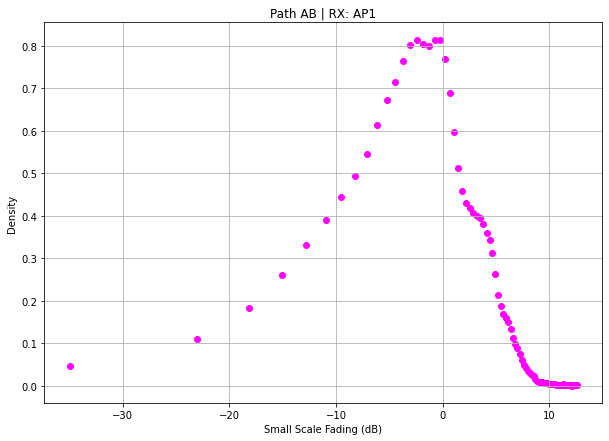

In [9]:
nAP = 'AP1'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [10]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata)
(1189, 243)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP1

Best Fitness: 1189.1448110811102
Best Gen: 72
Kappa: 1.9261246433401709
Mu: 0.8463907793007993
R_hat: 1.2259489324464612
Mt: 2.956594150091287
Elapsed time is 46.266045331954956 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP1

Best Fitness: 242.36043742732113
Best Gen: 199
Kappa: 0.6738640290148498
Mu: 0.9820606636102762
R_hat: 1.1552098576177205
Mt: 7.474754845386898
Elapsed time is 36.500924825668335 seconds.


(1189, 243)

#### Plots

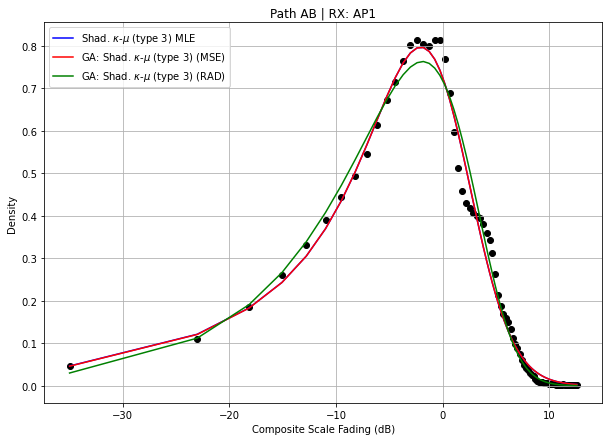

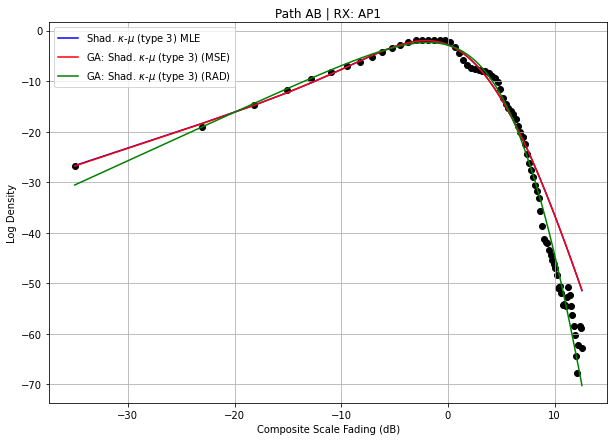

In [11]:
mle_sku_t3_pathAB_ap1 = [1.9366, 0.84431, 1.2258, 2.9567]
sku_t3_AB_ap1_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathAB_ap1[0], mle_sku_t3_pathAB_ap1[1], mle_sku_t3_pathAB_ap1[2], mle_sku_t3_pathAB_ap1[3]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t3_AB_ap1_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t3_AB_ap1_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [12]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, mle_sku_t3_pathAB_ap1[0], mle_sku_t3_pathAB_ap1[1], mle_sku_t3_pathAB_ap1[2], mle_sku_t3_pathAB_ap1[3]).astype(float)))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_mse, mu_mse, r_hat_mse, mt_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_rad, mu_rad, r_hat_rad, mt_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['MLE - Shad. KappaMu Type 3', 'GA - Shad. KappaMu Type 3 (Fitness = MSE)',\
                   'GA - Shad. KappaMu Type 3 (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu Type 3 (Fitness = RAD),31906.488668
1,MLE - Shad. KappaMu Type 3,32240.304398
2,GA - Shad. KappaMu Type 3 (Fitness = MSE),32240.347921


### AP 2

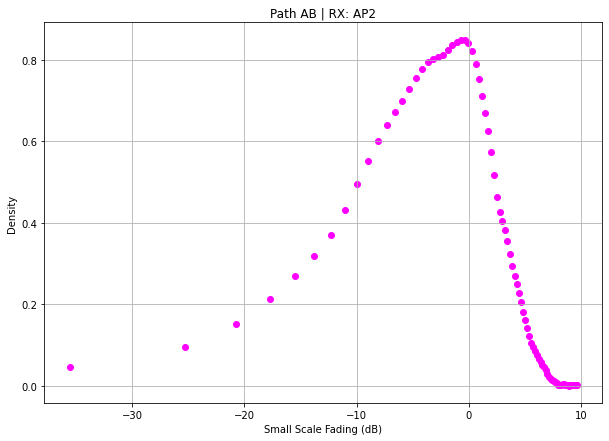

In [13]:
nAP = 'AP2'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [14]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata)
(3381, 1118)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP2

Best Fitness: 3326.329146678802
Best Gen: 193
Kappa: 1.197515514563242
Mu: 0.9136930626108446
R_hat: 1.0336279351288964
Mt: 15.31218218180446
Elapsed time is 42.60208344459534 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP2

Best Fitness: 1047.6265106019189
Best Gen: 197
Kappa: 1.1601120038404817
Mu: 0.9258556760403218
R_hat: 1.0284316048903968
Mt: 18.557964429021393
Elapsed time is 36.21014070510864 seconds.


(3381, 1118)

#### Plots

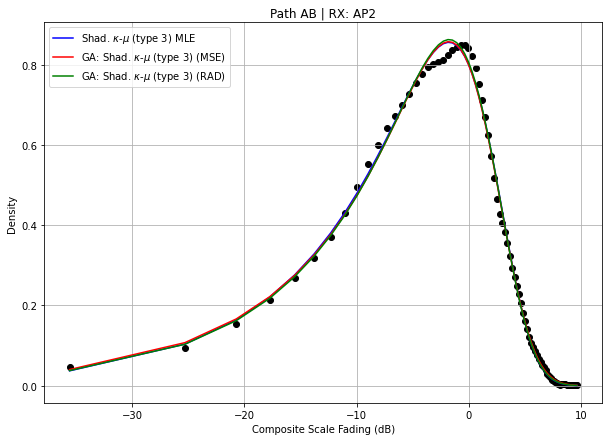

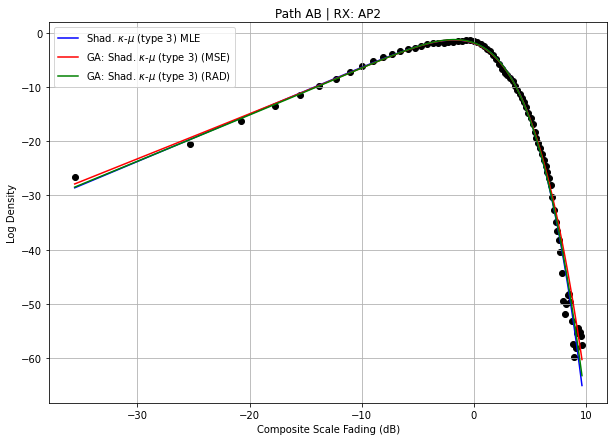

In [15]:
mle_sku_t3_pathAB_ap2 = [1.0565, 0.93392, 1.0277, 23.776]
sku_t3_AB_ap2_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathAB_ap2[0], mle_sku_t3_pathAB_ap2[1], mle_sku_t3_pathAB_ap2[2], mle_sku_t3_pathAB_ap2[3]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t3_AB_ap2_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t3_AB_ap2_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [16]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, mle_sku_t3_pathAB_ap2[0], mle_sku_t3_pathAB_ap2[1], mle_sku_t3_pathAB_ap2[2], mle_sku_t3_pathAB_ap2[3]).astype(float)))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_mse, mu_mse, r_hat_mse, mt_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_rad, mu_rad, r_hat_rad, mt_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['MLE - Shad. KappaMu Type 3', 'GA - Shad. KappaMu Type 3 (Fitness = MSE)',\
                   'GA - Shad. KappaMu Type 3 (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,MLE - Shad. KappaMu Type 3,20802.724084
1,GA - Shad. KappaMu Type 3 (Fitness = RAD),20805.981810
2,GA - Shad. KappaMu Type 3 (Fitness = MSE),20817.125956


### AP 3

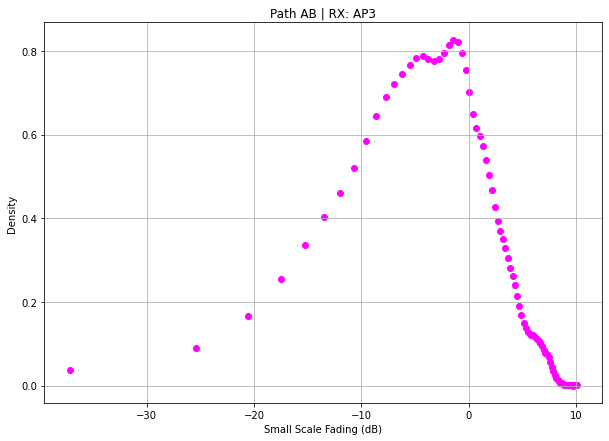

In [17]:
nAP = 'AP3'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [18]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata)
(3016, 212)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP3

Best Fitness: 3019.382945597984
Best Gen: 151
Kappa: 0.5881924065955109
Mu: 0.9828670205059076
R_hat: 1.0904566939571465
Mt: 4.781058883184004
Elapsed time is 41.39751410484314 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP3

Best Fitness: 212.4029146407291
Best Gen: 198
Kappa: 0.06758505565195883
Mu: 0.9682446535862933
R_hat: 1.061427935785854
Mt: 17.834560519083148
Elapsed time is 28.6699275970459 seconds.


(3016, 212)

#### Plots

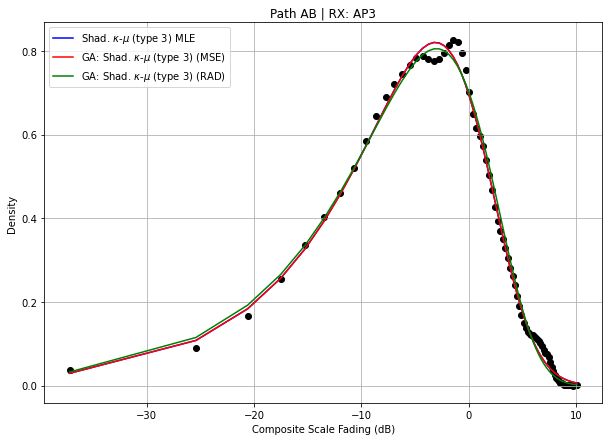

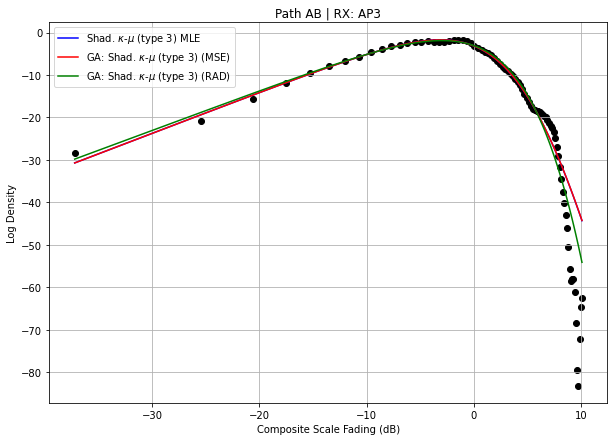

In [19]:
mle_sku_t3_pathAB_ap3 = [0.58654, 0.98284, 1.0899, 4.7946]
sku_t3_AB_ap3_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathAB_ap3[0], mle_sku_t3_pathAB_ap3[1], mle_sku_t3_pathAB_ap3[2], mle_sku_t3_pathAB_ap3[3]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t3_AB_ap3_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t3_AB_ap3_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [20]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, mle_sku_t3_pathAB_ap3[0], mle_sku_t3_pathAB_ap3[1], mle_sku_t3_pathAB_ap3[2], mle_sku_t3_pathAB_ap3[3]).astype(float)))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_mse, mu_mse, r_hat_mse, mt_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_rad, mu_rad, r_hat_rad, mt_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['MLE - Shad. KappaMu Type 3', 'GA - Shad. KappaMu Type 3 (Fitness = MSE)',\
                   'GA - Shad. KappaMu Type 3 (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu Type 3 (Fitness = RAD),28843.675051
1,MLE - Shad. KappaMu Type 3,28971.740057
2,GA - Shad. KappaMu Type 3 (Fitness = MSE),28973.178995


### AP 4

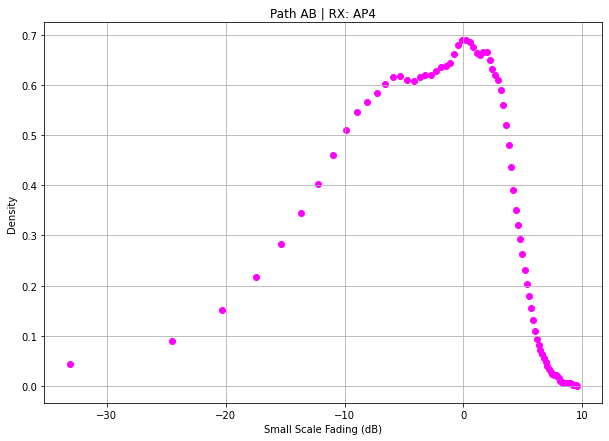

In [21]:
nAP = 'AP4'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [22]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata)
(550, 186)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP4

Best Fitness: 550.3349949446934
Best Gen: 81
Kappa: 1.2041070011583654
Mu: 0.7967262371584203
R_hat: 1.1589639552452522
Mt: 109.92948548366607
Elapsed time is 48.5276255607605 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP4

Best Fitness: 186.21990512877483
Best Gen: 83
Kappa: 1.1946159225883903
Mu: 0.8443534845948585
R_hat: 1.1287450155755485
Mt: 109.97974761429079
Elapsed time is 49.01215982437134 seconds.


(550, 186)

#### Plots

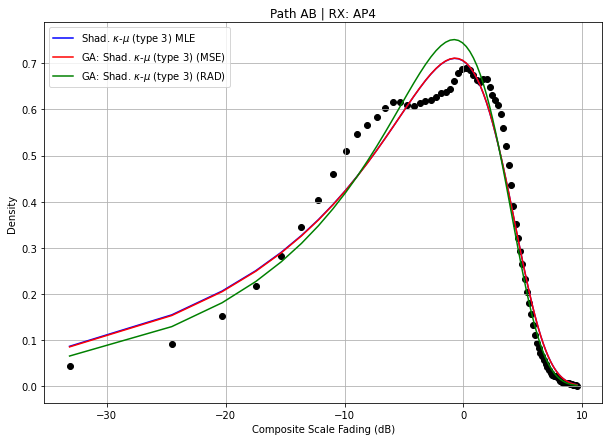

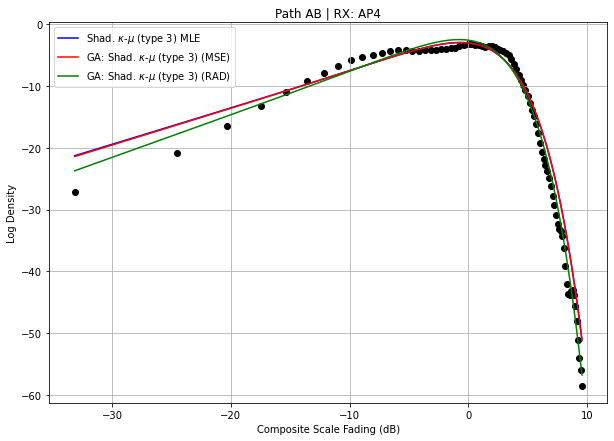

In [23]:
mle_sku_t3_pathAB_ap4 = [1.2136, 0.79397, 1.1589, 100]
sku_t3_AB_ap4_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathAB_ap4[0], mle_sku_t3_pathAB_ap4[1], mle_sku_t3_pathAB_ap4[2], mle_sku_t3_pathAB_ap4[3]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t3_AB_ap4_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t3_AB_ap4_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [24]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, mle_sku_t3_pathAB_ap4[0], mle_sku_t3_pathAB_ap4[1], mle_sku_t3_pathAB_ap4[2], mle_sku_t3_pathAB_ap4[3]).astype(float)))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_mse, mu_mse, r_hat_mse, mt_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_rad, mu_rad, r_hat_rad, mt_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['MLE - Shad. KappaMu Type 3', 'GA - Shad. KappaMu Type 3 (Fitness = MSE)',\
                   'GA - Shad. KappaMu Type 3 (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu Type 3 (Fitness = RAD),27626.509583
1,GA - Shad. KappaMu Type 3 (Fitness = MSE),27759.412662
2,MLE - Shad. KappaMu Type 3,27764.327251


### AP 5

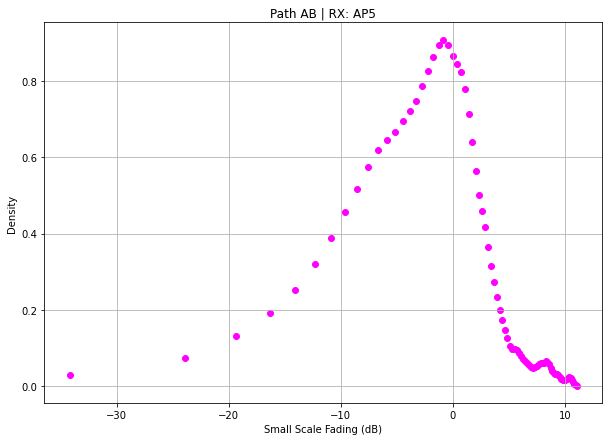

In [25]:
nAP = 'AP5'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [26]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata)
(741, 156)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP5

Best Fitness: 741.8919822518816
Best Gen: 197
Kappa: 1.9718736795607392
Mu: 0.8432682337377807
R_hat: 1.0517679150387722
Mt: 9.043942482741956
Elapsed time is 43.28540062904358 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP5

Best Fitness: 90.79258840804395
Best Gen: 147
Kappa: 2.507359646804658
Mu: 0.8579297773420137
R_hat: 1.1767764022678944
Mt: 2.745782589180177
Elapsed time is 39.1214702129364 seconds.


(741, 156)

#### Plots

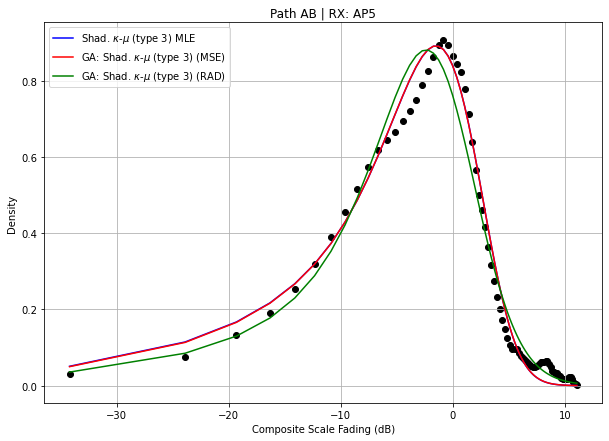

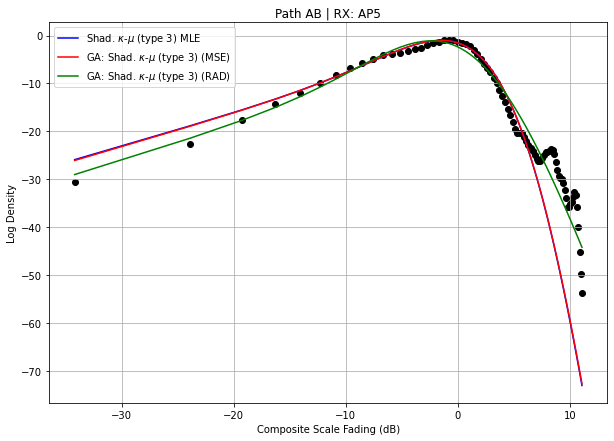

In [27]:
mle_sku_t3_pathAB_ap5 = [1.9876, 0.83913, 1.0512, 9.1532]
sku_t3_AB_ap5_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathAB_ap5[0], mle_sku_t3_pathAB_ap5[1], mle_sku_t3_pathAB_ap5[2], mle_sku_t3_pathAB_ap5[3]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t3_AB_ap5_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t3_AB_ap5_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [28]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, mle_sku_t3_pathAB_ap5[0], mle_sku_t3_pathAB_ap5[1], mle_sku_t3_pathAB_ap5[2], mle_sku_t3_pathAB_ap5[3]).astype(float)))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_mse, mu_mse, r_hat_mse, mt_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_rad, mu_rad, r_hat_rad, mt_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['MLE - Shad. KappaMu Type 3', 'GA - Shad. KappaMu Type 3 (Fitness = MSE)',\
                   'GA - Shad. KappaMu Type 3 (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu Type 3 (Fitness = RAD),26980.295346
1,GA - Shad. KappaMu Type 3 (Fitness = MSE),28421.218911
2,MLE - Shad. KappaMu Type 3,28451.073734


### AP 6

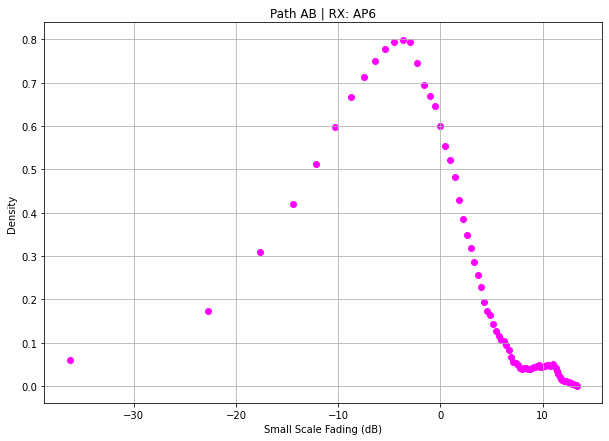

In [29]:
nAP = 'AP6'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [30]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata)
(4250, 129)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP6

Best Fitness: 4250.616478465226
Best Gen: 192
Kappa: 1.0784607777178437
Mu: 0.8939740161205597
R_hat: 1.3663269981655317
Mt: 1.699327914383684
Elapsed time is 43.42219567298889 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP6

Best Fitness: 129.5115905590489
Best Gen: 100
Kappa: 1.5801529879331635
Mu: 0.8595580373444633
R_hat: 1.7297533330974264
Mt: 1.3067326651801159
Elapsed time is 37.717618465423584 seconds.


(4250, 129)

#### Plots

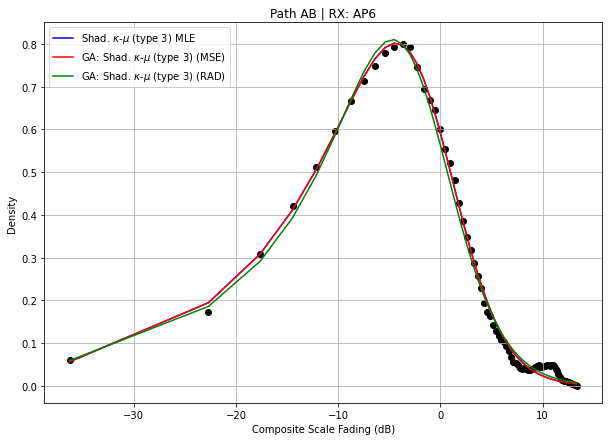

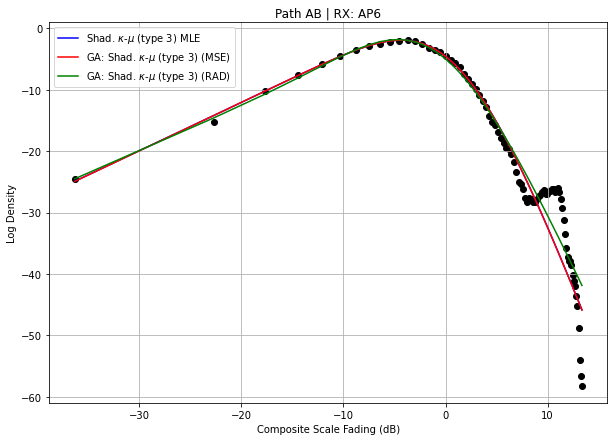

In [31]:
mle_sku_t3_pathAB_ap6 = [1.0872, 0.89312, 1.3687, 1.6933]
sku_t3_AB_ap6_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathAB_ap6[0], mle_sku_t3_pathAB_ap6[1], mle_sku_t3_pathAB_ap6[2], mle_sku_t3_pathAB_ap6[3]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t3_AB_ap6_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t3_AB_ap6_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [32]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, mle_sku_t3_pathAB_ap6[0], mle_sku_t3_pathAB_ap6[1], mle_sku_t3_pathAB_ap6[2], mle_sku_t3_pathAB_ap6[3]).astype(float)))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_mse, mu_mse, r_hat_mse, mt_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_rad, mu_rad, r_hat_rad, mt_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['MLE - Shad. KappaMu Type 3', 'GA - Shad. KappaMu Type 3 (Fitness = MSE)',\
                   'GA - Shad. KappaMu Type 3 (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu Type 3 (Fitness = MSE),31165.033077
1,MLE - Shad. KappaMu Type 3,31165.082640
2,GA - Shad. KappaMu Type 3 (Fitness = RAD),31303.295298


### AP 7

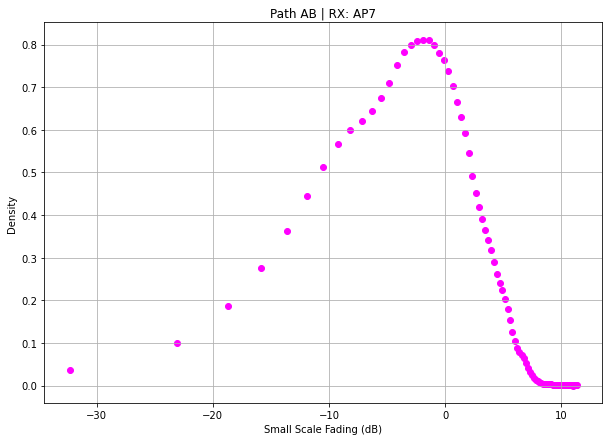

In [33]:
nAP = 'AP7'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [34]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata)
(4622, 832)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP7

Best Fitness: 4450.624455734412
Best Gen: 199
Kappa: 0.8366717102347083
Mu: 0.937089929768174
R_hat: 1.084240395230145
Mt: 9.102245121598498
Elapsed time is 43.258782148361206 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP7

Best Fitness: 753.1325798038615
Best Gen: 198
Kappa: 0.4731727239292131
Mu: 0.9897486698145658
R_hat: 1.065278710460582
Mt: 35.28953158427565
Elapsed time is 36.0298810005188 seconds.


(4622, 832)

#### Plots

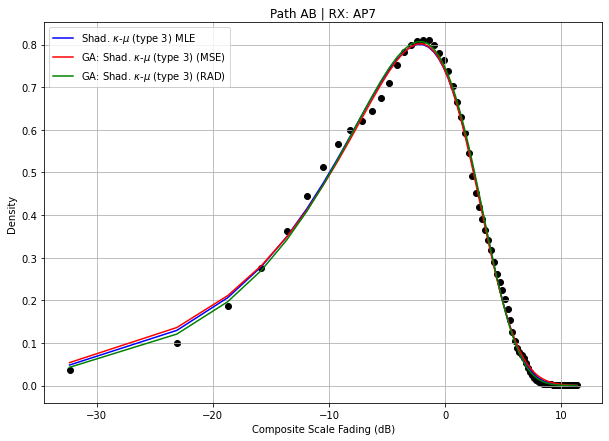

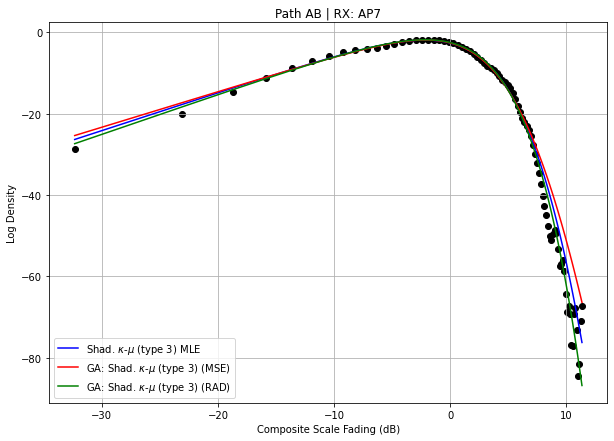

In [35]:
mle_sku_t3_pathAB_ap7 = [0.58883, 0.96639, 1.0735, 16.723]
sku_t3_AB_ap7_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathAB_ap7[0], mle_sku_t3_pathAB_ap7[1], mle_sku_t3_pathAB_ap7[2], mle_sku_t3_pathAB_ap7[3]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t3_AB_ap7_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t3_AB_ap7_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [36]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, mle_sku_t3_pathAB_ap7[0], mle_sku_t3_pathAB_ap7[1], mle_sku_t3_pathAB_ap7[2], mle_sku_t3_pathAB_ap7[3]).astype(float)))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_mse, mu_mse, r_hat_mse, mt_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_rad, mu_rad, r_hat_rad, mt_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['MLE - Shad. KappaMu Type 3', 'GA - Shad. KappaMu Type 3 (Fitness = MSE)',\
                   'GA - Shad. KappaMu Type 3 (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu Type 3 (Fitness = RAD),24154.243520
1,MLE - Shad. KappaMu Type 3,24190.916224
2,GA - Shad. KappaMu Type 3 (Fitness = MSE),24271.532052


### AP 8

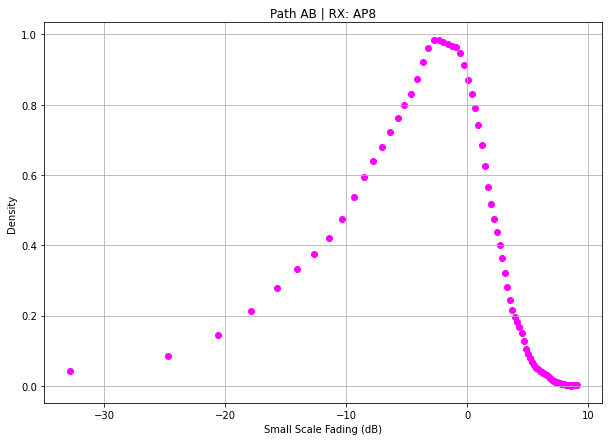

In [37]:
nAP = 'AP8'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [38]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata)
(5705, 1664)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP8

Best Fitness: 5745.783572395655
Best Gen: 199
Kappa: 1.772354646879606
Mu: 0.8758682204346814
R_hat: 0.9496539642907443
Mt: 15.913044922390078
Elapsed time is 43.37607526779175 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP8

Best Fitness: 1663.5011342081937
Best Gen: 189
Kappa: 1.655025241891945
Mu: 0.9237295110060987
R_hat: 0.9578504936405852
Mt: 10.856476668980745
Elapsed time is 38.21446943283081 seconds.


(5705, 1664)

#### Plots

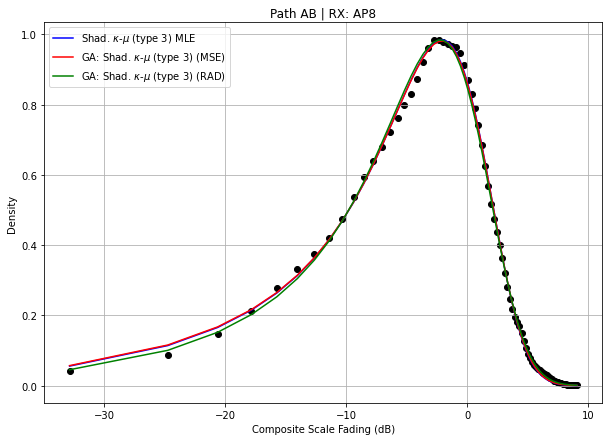

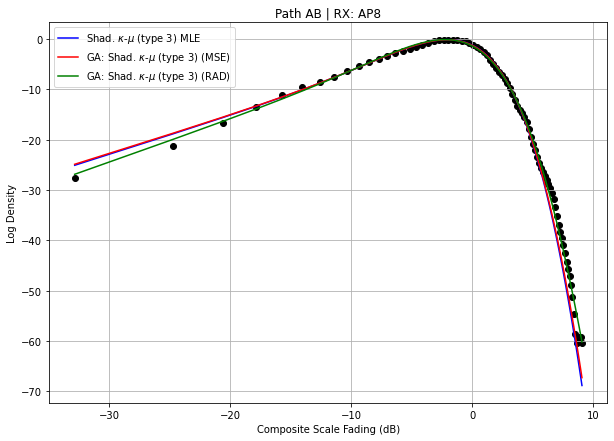

In [39]:
mle_sku_t3_pathAB_ap8 = [1.7546, 0.88092, 0.94775, 17.168]
sku_t3_AB_ap8_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathAB_ap8[0], mle_sku_t3_pathAB_ap8[1], mle_sku_t3_pathAB_ap8[2], mle_sku_t3_pathAB_ap8[3]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t3_AB_ap8_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t3_AB_ap8_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [40]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, mle_sku_t3_pathAB_ap8[0], mle_sku_t3_pathAB_ap8[1], mle_sku_t3_pathAB_ap8[2], mle_sku_t3_pathAB_ap8[3]).astype(float)))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_mse, mu_mse, r_hat_mse, mt_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_rad, mu_rad, r_hat_rad, mt_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['MLE - Shad. KappaMu Type 3', 'GA - Shad. KappaMu Type 3 (Fitness = MSE)',\
                   'GA - Shad. KappaMu Type 3 (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu Type 3 (Fitness = RAD),18092.927332
1,GA - Shad. KappaMu Type 3 (Fitness = MSE),18125.935410
2,MLE - Shad. KappaMu Type 3,18133.293648


### AP 9

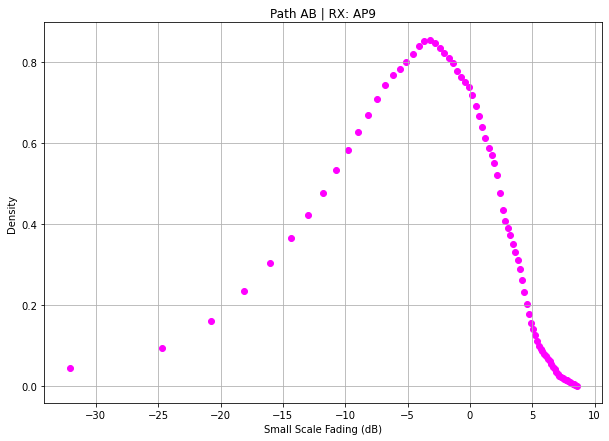

In [41]:
nAP = 'AP9'
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [42]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata)
(8509, 2388)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP9

Best Fitness: 5016.145926404698
Best Gen: 199
Kappa: 0.5515776543306096
Mu: 0.9824993400819834
R_hat: 1.0303235385217153
Mt: 9.401323896513714
Elapsed time is 42.16091442108154 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP9

Best Fitness: 2367.6843170478405
Best Gen: 196
Kappa: 0.25301537029699
Mu: 1.0020262529032096
R_hat: 1.0111476994584447
Mt: 46.76817581619125
Elapsed time is 34.350950956344604 seconds.


(8509, 2388)

#### Plots

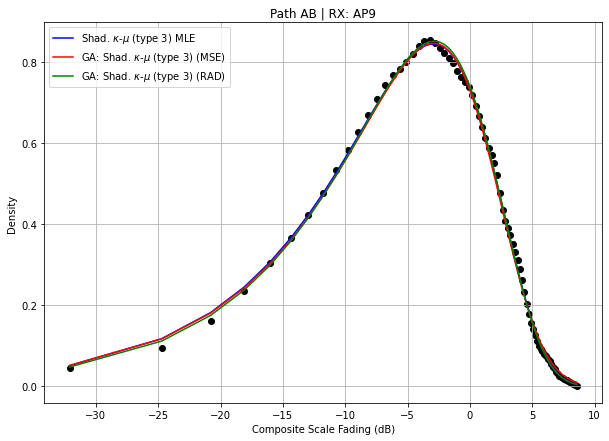

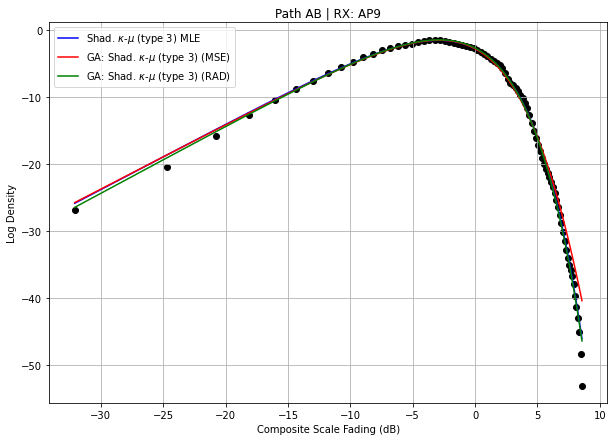

In [43]:
mle_sku_t3_pathAB_ap9 = [0.15736, 0.99008, 1.0133, 100]
sku_t3_AB_ap9_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathAB_ap9[0], mle_sku_t3_pathAB_ap9[1], mle_sku_t3_pathAB_ap9[2], mle_sku_t3_pathAB_ap9[3]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t3_AB_ap9_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t3_AB_ap9_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [44]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, mle_sku_t3_pathAB_ap9[0], mle_sku_t3_pathAB_ap9[1], mle_sku_t3_pathAB_ap9[2], mle_sku_t3_pathAB_ap9[3]).astype(float)))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_mse, mu_mse, r_hat_mse, mt_mse)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_rad, mu_rad, r_hat_rad, mt_rad)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['MLE - Shad. KappaMu Type 3', 'GA - Shad. KappaMu Type 3 (Fitness = MSE)',\
                   'GA - Shad. KappaMu Type 3 (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu Type 3 (Fitness = RAD),21671.979734
1,MLE - Shad. KappaMu Type 3,21679.844117
2,GA - Shad. KappaMu Type 3 (Fitness = MSE),21787.228726


## Shadowed $\kappa$-$\mu$ (type 3) - Path: BA

In [45]:
path = 'BA'

### AP 1

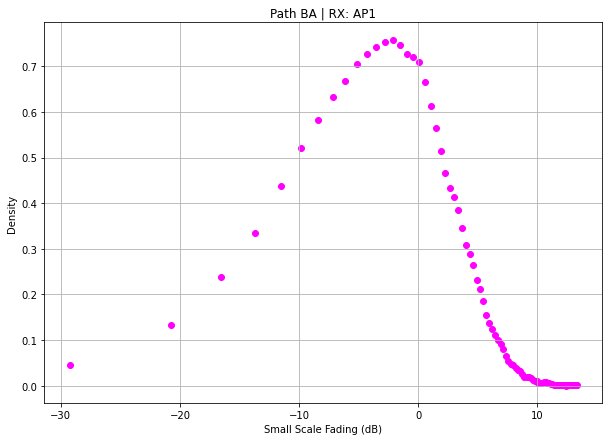

In [46]:
nAP = 'AP1'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [47]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata)
(14154, 1835)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP1

Best Fitness: 14033.71044820931
Best Gen: 192
Kappa: 0.2626455211975337
Mu: 1.0137367788344187
R_hat: 1.1689703350647325
Mt: 5.4656485237929076
Elapsed time is 41.37020754814148 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP1

Best Fitness: 1731.222170279105
Best Gen: 199
Kappa: 0.3583353817182328
Mu: 1.0258891088965048
R_hat: 1.1673958113824938
Mt: 5.257564492756608
Elapsed time is 37.74476909637451 seconds.


(14154, 1835)

#### Plots

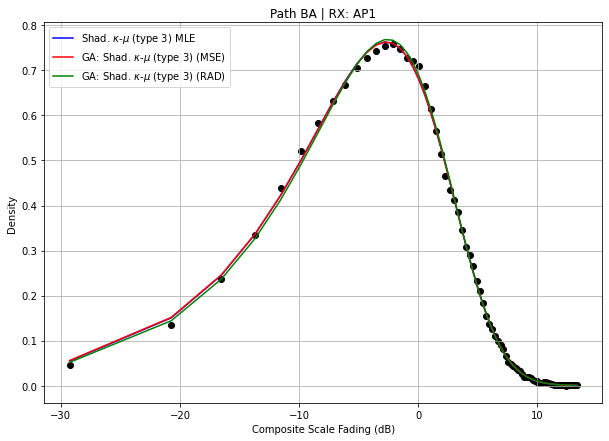

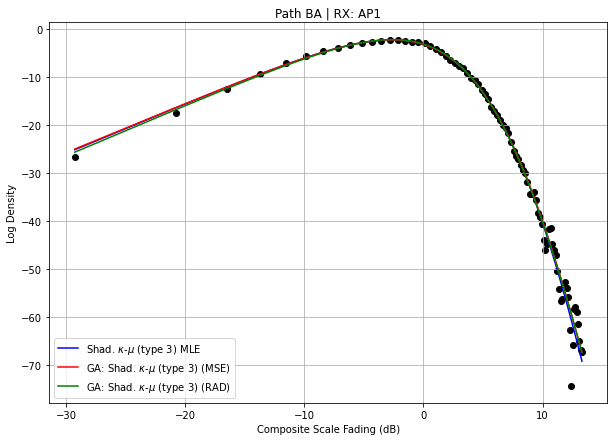

In [48]:
mle_sku_t3_pathBA_ap1 = [0.001, 1.0186, 1.1659, 6.1736]
sku_t3_BA_ap1_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathBA_ap1[0], mle_sku_t3_pathBA_ap1[1], mle_sku_t3_pathBA_ap1[2], mle_sku_t3_pathBA_ap1[3]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t3_BA_ap1_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t3_BA_ap1_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [49]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, mle_sku_t3_pathBA_ap1[0], mle_sku_t3_pathBA_ap1[1], mle_sku_t3_pathBA_ap1[2], mle_sku_t3_pathBA_ap1[3]).astype(float)))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_mse, mu_mse, r_hat_mse, mt_mse).astype(float)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_rad, mu_rad, r_hat_rad, mt_rad).astype(float)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['MLE - Shad. KappaMu Type 3', 'GA - Shad. KappaMu Type 3 (Fitness = MSE)',\
                   'GA - Shad. KappaMu Type 3 (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu Type 3 (Fitness = RAD),32032.605609
1,MLE - Shad. KappaMu Type 3,32032.788642
2,GA - Shad. KappaMu Type 3 (Fitness = MSE),32037.155276


### AP 2

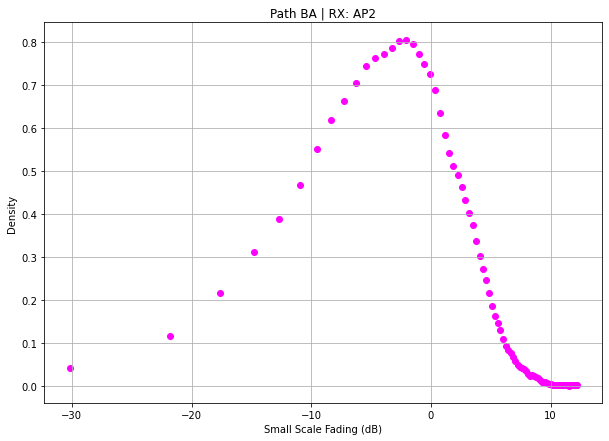

In [50]:
nAP = 'AP2'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [51]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata)
(12252, 1417)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP2

Best Fitness: 11937.270512659454
Best Gen: 199
Kappa: 0.30025171769266545
Mu: 1.0294140018608378
R_hat: 1.1094997530993003
Mt: 6.7650325796176105
Elapsed time is 41.92071890830994 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP2

Best Fitness: 1303.887660560507
Best Gen: 198
Kappa: 0.33831232128021627
Mu: 1.030843081548956
R_hat: 1.0992430528314834
Mt: 7.584593407552461
Elapsed time is 35.488224506378174 seconds.


(12252, 1417)

#### Plots

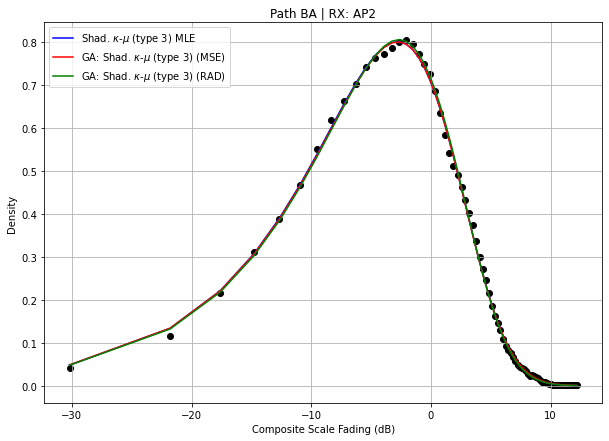

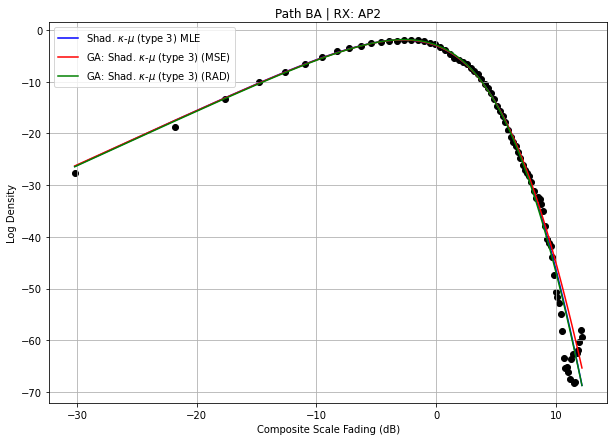

In [52]:
mle_sku_t3_pathBA_ap2 = [0.001, 1.0333, 1.1033, 8.6018]
sku_t3_BA_ap2_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathBA_ap2[0], mle_sku_t3_pathBA_ap2[1], mle_sku_t3_pathBA_ap2[2], mle_sku_t3_pathBA_ap2[3]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t3_BA_ap2_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t3_BA_ap2_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [53]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, mle_sku_t3_pathBA_ap2[0], mle_sku_t3_pathBA_ap2[1], mle_sku_t3_pathBA_ap2[2], mle_sku_t3_pathBA_ap2[3]).astype(float)))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_mse, mu_mse, r_hat_mse, mt_mse).astype(float)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_rad, mu_rad, r_hat_rad, mt_rad).astype(float)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['MLE - Shad. KappaMu Type 3', 'GA - Shad. KappaMu Type 3 (Fitness = MSE)',\
                   'GA - Shad. KappaMu Type 3 (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,MLE - Shad. KappaMu Type 3,28439.027990
1,GA - Shad. KappaMu Type 3 (Fitness = RAD),28439.807508
2,GA - Shad. KappaMu Type 3 (Fitness = MSE),28451.035048


### AP 3

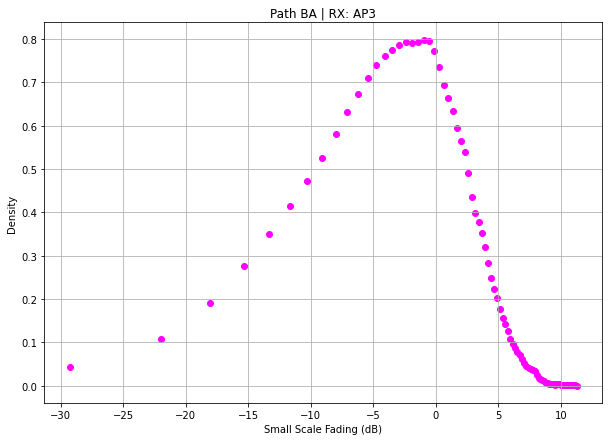

In [54]:
nAP = 'AP3'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [55]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata)
(19006, 2182)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP3

Best Fitness: 6356.415040802601
Best Gen: 3
Kappa: 1.2203945925604203
Mu: 0.9149001710026491
R_hat: 1.0937609738819478
Mt: 7.253521248201324
Elapsed time is 44.90979075431824 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP3

Best Fitness: 2185.8770364718875
Best Gen: 197
Kappa: 0.5746668344256427
Mu: 1.0232905509592238
R_hat: 1.0891031995820044
Mt: 9.986215623450596
Elapsed time is 35.179606914520264 seconds.


(19006, 2182)

#### Plots

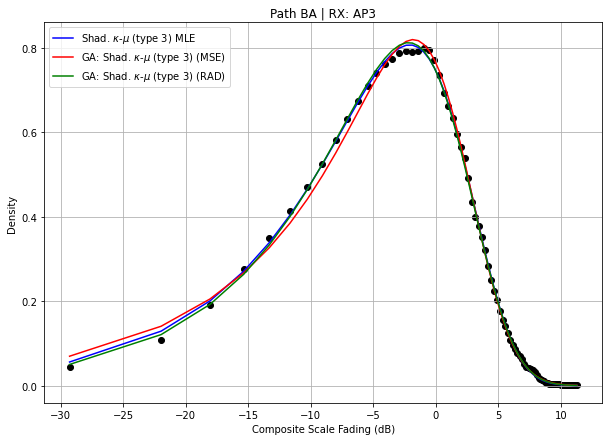

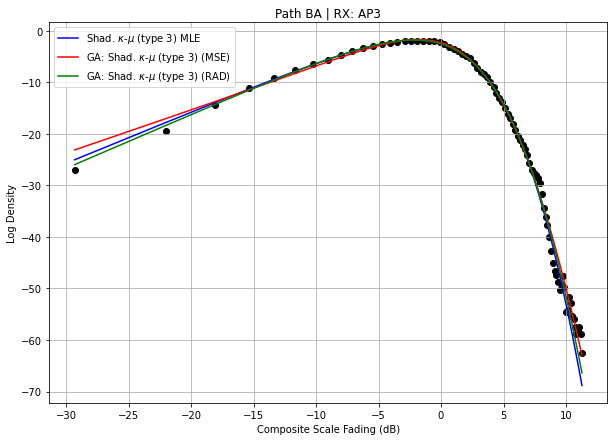

In [56]:
mle_sku_t3_pathBA_ap3 = [0.63795, 0.99672, 1.0865, 11.307]
sku_t3_BA_ap3_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathBA_ap3[0], mle_sku_t3_pathBA_ap3[1], mle_sku_t3_pathBA_ap3[2], mle_sku_t3_pathBA_ap3[3]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t3_BA_ap3_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t3_BA_ap3_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [57]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, mle_sku_t3_pathBA_ap3[0], mle_sku_t3_pathBA_ap3[1], mle_sku_t3_pathBA_ap3[2], mle_sku_t3_pathBA_ap3[3]).astype(float)))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_mse, mu_mse, r_hat_mse, mt_mse).astype(float)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_rad, mu_rad, r_hat_rad, mt_rad).astype(float)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['MLE - Shad. KappaMu Type 3', 'GA - Shad. KappaMu Type 3 (Fitness = MSE)',\
                   'GA - Shad. KappaMu Type 3 (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu Type 3 (Fitness = RAD),26126.227640
1,MLE - Shad. KappaMu Type 3,26136.624964
2,GA - Shad. KappaMu Type 3 (Fitness = MSE),26181.582406


### AP 4

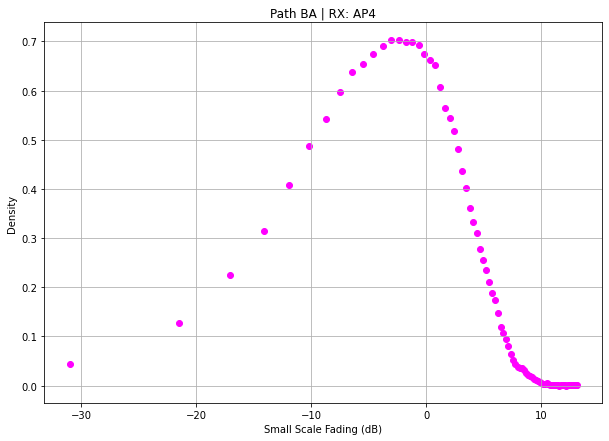

In [58]:
nAP = 'AP4'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [59]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata)
(11563, 1325)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP4

Best Fitness: 12281.539594944026
Best Gen: 8
Kappa: 0.05015125425240046
Mu: 0.9462612235015945
R_hat: 1.1742950347764254
Mt: 18.924371212523887
Elapsed time is 40.58519983291626 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP4

Best Fitness: 1325.5906906721602
Best Gen: 173
Kappa: 0.08624731283151002
Mu: 0.9693190675672991
R_hat: 1.1778817824382029
Mt: 13.982160967915199
Elapsed time is 30.170573711395264 seconds.


(11563, 1325)

#### Plots

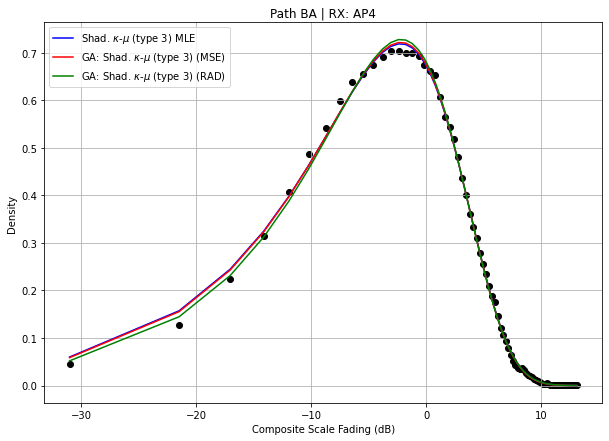

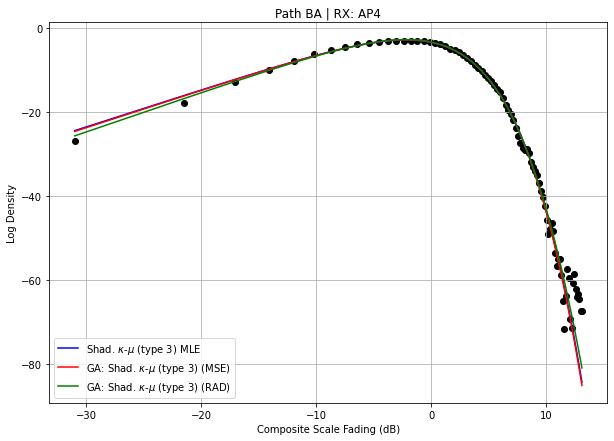

In [60]:
mle_sku_t3_pathBA_ap4 = [0.001, 0.94198, 1.1774, 18.948]
sku_t3_BA_ap4_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathBA_ap4[0], mle_sku_t3_pathBA_ap4[1], mle_sku_t3_pathBA_ap4[2], mle_sku_t3_pathBA_ap4[3]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t3_BA_ap4_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t3_BA_ap4_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [61]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, mle_sku_t3_pathBA_ap4[0], mle_sku_t3_pathBA_ap4[1], mle_sku_t3_pathBA_ap4[2], mle_sku_t3_pathBA_ap4[3]).astype(float)))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_mse, mu_mse, r_hat_mse, mt_mse).astype(float)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_rad, mu_rad, r_hat_rad, mt_rad).astype(float)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['MLE - Shad. KappaMu Type 3', 'GA - Shad. KappaMu Type 3 (Fitness = MSE)',\
                   'GA - Shad. KappaMu Type 3 (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu Type 3 (Fitness = RAD),31812.364148
1,GA - Shad. KappaMu Type 3 (Fitness = MSE),31826.031877
2,MLE - Shad. KappaMu Type 3,31828.556746


### AP 5

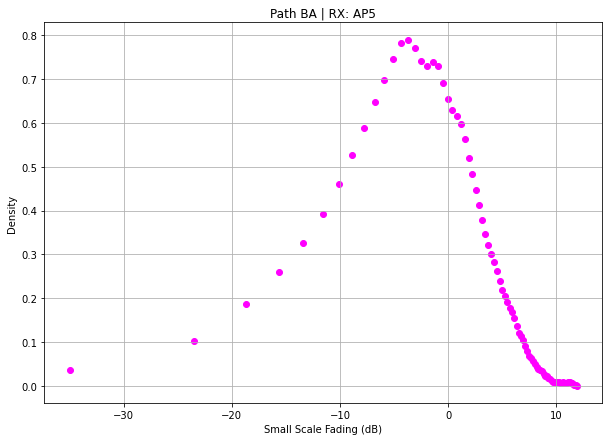

In [62]:
nAP = 'AP5'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [63]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata)
(8141, 1020)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP5

Best Fitness: 8143.908467047375
Best Gen: 88
Kappa: 0.005971061612252504
Mu: 1.0750162113944577
R_hat: 1.2228951490988578
Mt: 3.7319957045342687
Elapsed time is 38.46627378463745 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP5

Best Fitness: 1017.3598102841336
Best Gen: 196
Kappa: 0.14581444082587292
Mu: 1.0270282657491598
R_hat: 1.2000807177582868
Mt: 4.672108307822074
Elapsed time is 30.271231174468994 seconds.


(8141, 1020)

#### Plots

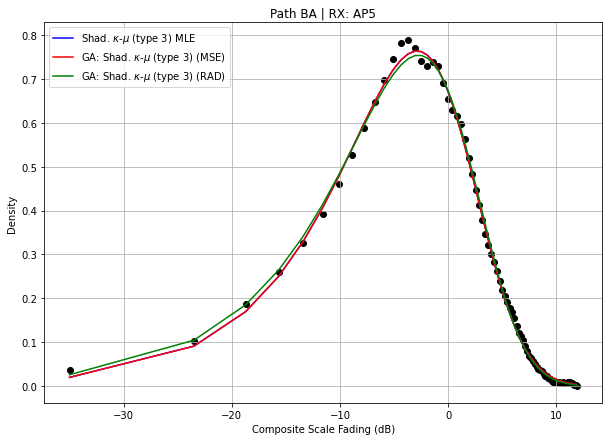

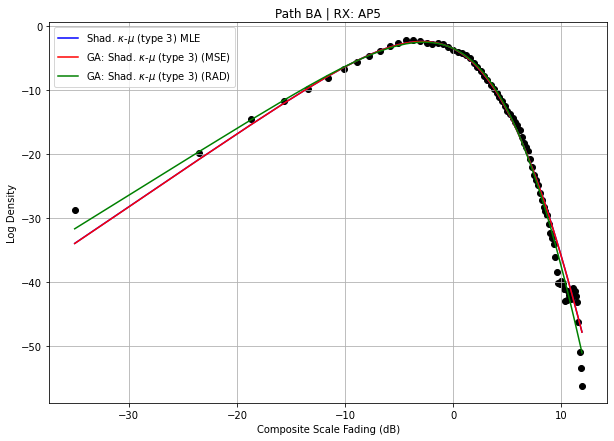

In [64]:
mle_sku_t3_pathBA_ap5 = [0.001, 1.0747, 1.2232, 3.7281]
sku_t3_BA_ap5_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathBA_ap5[0], mle_sku_t3_pathBA_ap5[1], mle_sku_t3_pathBA_ap5[2], mle_sku_t3_pathBA_ap5[3]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t3_BA_ap5_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t3_BA_ap5_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [65]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, mle_sku_t3_pathBA_ap5[0], mle_sku_t3_pathBA_ap5[1], mle_sku_t3_pathBA_ap5[2], mle_sku_t3_pathBA_ap5[3]).astype(float)))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_mse, mu_mse, r_hat_mse, mt_mse).astype(float)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_rad, mu_rad, r_hat_rad, mt_rad).astype(float)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['MLE - Shad. KappaMu Type 3', 'GA - Shad. KappaMu Type 3 (Fitness = MSE)',\
                   'GA - Shad. KappaMu Type 3 (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu Type 3 (Fitness = RAD),31359.919934
1,GA - Shad. KappaMu Type 3 (Fitness = MSE),31407.115484
2,MLE - Shad. KappaMu Type 3,31407.801528


### AP 6

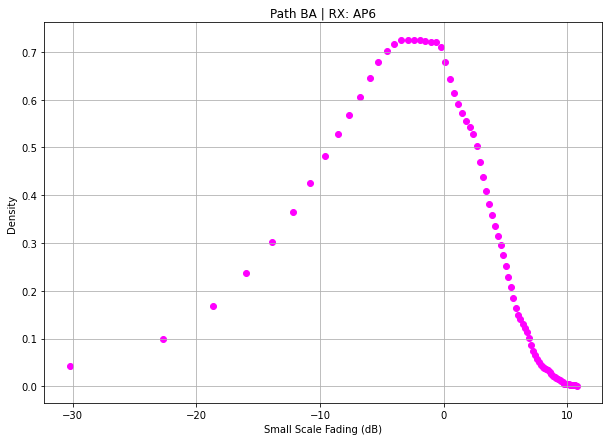

In [66]:
nAP = 'AP6'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [67]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata)
(12276, 2503)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP6

Best Fitness: 12084.18888846979
Best Gen: 195
Kappa: 0.2393183516878199
Mu: 1.0010180441017758
R_hat: 1.1920911588696508
Mt: 8.041076657021625
Elapsed time is 41.10993695259094 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP6

Best Fitness: 2465.597653833249
Best Gen: 189
Kappa: 0.10696844023585061
Mu: 0.9960061043506425
R_hat: 1.176244406591726
Mt: 15.576182286115298
Elapsed time is 30.272900581359863 seconds.


(12276, 2503)

#### Plots

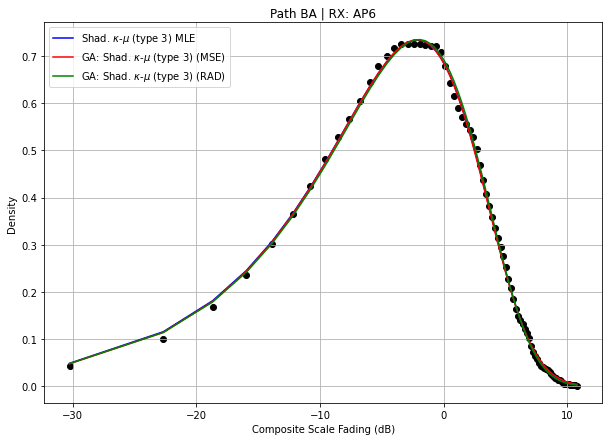

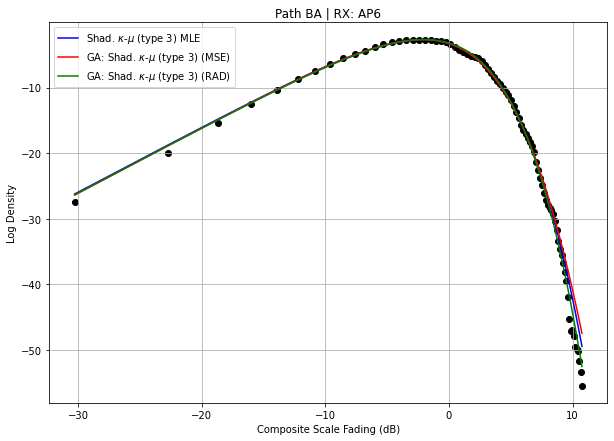

In [68]:
mle_sku_t3_pathBA_ap6 = [0.001, 0.99714, 1.1846, 11.198]
sku_t3_BA_ap6_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathBA_ap6[0], mle_sku_t3_pathBA_ap6[1], mle_sku_t3_pathBA_ap6[2], mle_sku_t3_pathBA_ap6[3]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t3_BA_ap6_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t3_BA_ap6_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [69]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, mle_sku_t3_pathBA_ap6[0], mle_sku_t3_pathBA_ap6[1], mle_sku_t3_pathBA_ap6[2], mle_sku_t3_pathBA_ap6[3]).astype(float)))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_mse, mu_mse, r_hat_mse, mt_mse).astype(float)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_rad, mu_rad, r_hat_rad, mt_rad).astype(float)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['MLE - Shad. KappaMu Type 3', 'GA - Shad. KappaMu Type 3 (Fitness = MSE)',\
                   'GA - Shad. KappaMu Type 3 (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu Type 3 (Fitness = RAD),30892.455232
1,MLE - Shad. KappaMu Type 3,30920.555499
2,GA - Shad. KappaMu Type 3 (Fitness = MSE),30954.512443


### AP 7

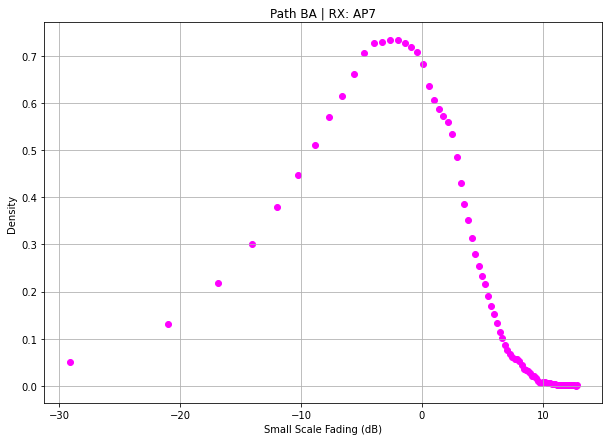

In [70]:
nAP = 'AP7'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [71]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata)
(12008, 1854)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP7

Best Fitness: 11735.565907872855
Best Gen: 199
Kappa: 0.42488733800074024
Mu: 0.9943052483280133
R_hat: 1.183761711304132
Mt: 6.569953923777932
Elapsed time is 42.142648696899414 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP7

Best Fitness: 1867.3180349842464
Best Gen: 193
Kappa: 0.3537604187774093
Mu: 1.0097307224005783
R_hat: 1.181071804824141
Mt: 7.017058607353626
Elapsed time is 33.850111961364746 seconds.


(12008, 1854)

#### Plots

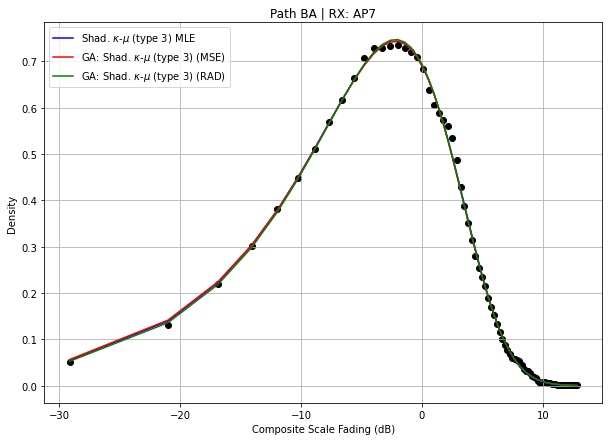

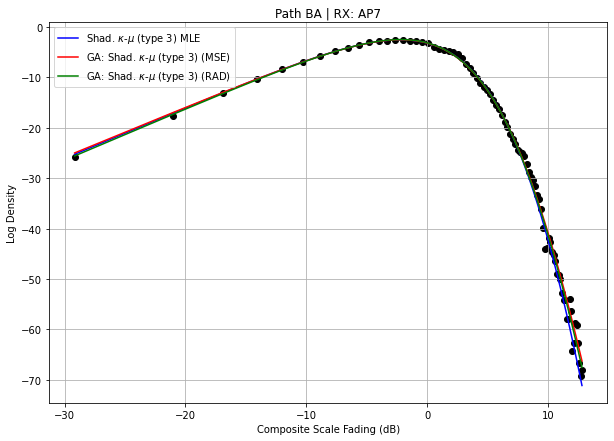

In [72]:
mle_sku_t3_pathBA_ap7 = [0.23121, 1.0031, 1.1761, 8.7936]
sku_t3_BA_ap7_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathBA_ap7[0], mle_sku_t3_pathBA_ap7[1], mle_sku_t3_pathBA_ap7[2], mle_sku_t3_pathBA_ap7[3]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t3_BA_ap7_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t3_BA_ap7_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [73]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, mle_sku_t3_pathBA_ap7[0], mle_sku_t3_pathBA_ap7[1], mle_sku_t3_pathBA_ap7[2], mle_sku_t3_pathBA_ap7[3]).astype(float)))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_mse, mu_mse, r_hat_mse, mt_mse).astype(float)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_rad, mu_rad, r_hat_rad, mt_rad).astype(float)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['MLE - Shad. KappaMu Type 3', 'GA - Shad. KappaMu Type 3 (Fitness = MSE)',\
                   'GA - Shad. KappaMu Type 3 (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu Type 3 (Fitness = RAD),32308.656252
1,MLE - Shad. KappaMu Type 3,32312.331832
2,GA - Shad. KappaMu Type 3 (Fitness = MSE),32316.094455


### AP 8

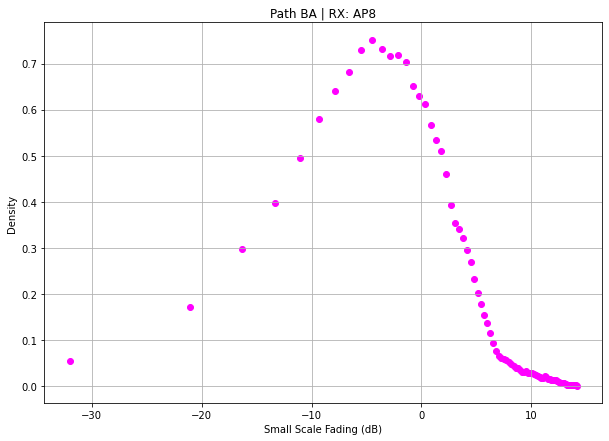

In [74]:
nAP = 'AP8'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [75]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata)
(8641, 403)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP8

Best Fitness: 8649.303118608083
Best Gen: 199
Kappa: 0.22569811912279353
Mu: 0.9622719556099408
R_hat: 1.241480280480054
Mt: 3.0900206386332916
Elapsed time is 41.047521352767944 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP8

Best Fitness: 403.22179494237935
Best Gen: 158
Kappa: 0.7148753997816717
Mu: 0.95887450824413
R_hat: 1.3105212149569578
Mt: 2.2138907095324316
Elapsed time is 36.71731972694397 seconds.


(8641, 403)

#### Plots

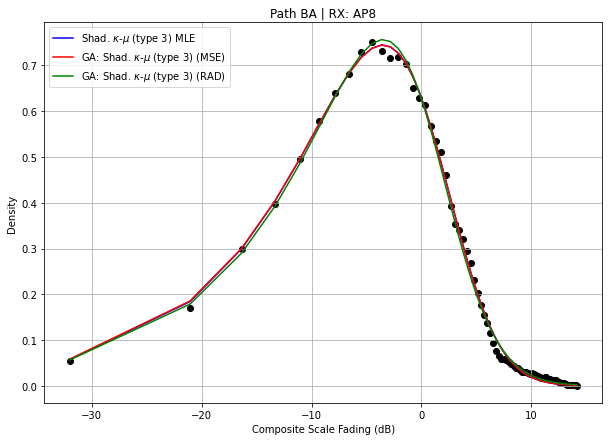

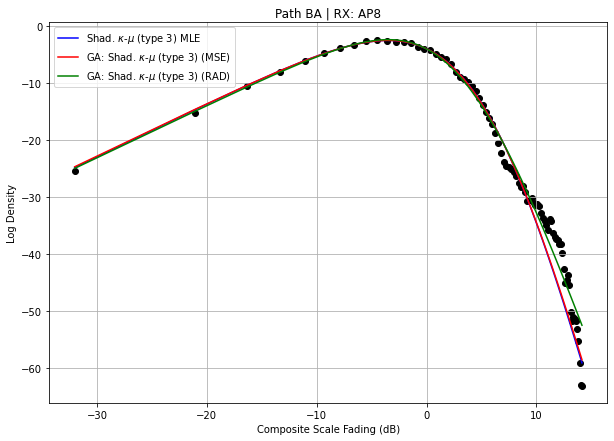

In [76]:
mle_sku_t3_pathBA_ap8 = [0.10842, 0.96613, 1.2382, 3.2039]
sku_t3_BA_ap8_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathBA_ap8[0], mle_sku_t3_pathBA_ap8[1], mle_sku_t3_pathBA_ap8[2], mle_sku_t3_pathBA_ap8[3]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t3_BA_ap8_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t3_BA_ap8_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [77]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, mle_sku_t3_pathBA_ap8[0], mle_sku_t3_pathBA_ap8[1], mle_sku_t3_pathBA_ap8[2], mle_sku_t3_pathBA_ap8[3]).astype(float)))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_mse, mu_mse, r_hat_mse, mt_mse).astype(float)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_rad, mu_rad, r_hat_rad, mt_rad).astype(float)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['MLE - Shad. KappaMu Type 3', 'GA - Shad. KappaMu Type 3 (Fitness = MSE)',\
                   'GA - Shad. KappaMu Type 3 (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu Type 3 (Fitness = RAD),34892.948115
1,GA - Shad. KappaMu Type 3 (Fitness = MSE),34900.226679
2,MLE - Shad. KappaMu Type 3,34905.643049


### AP 9

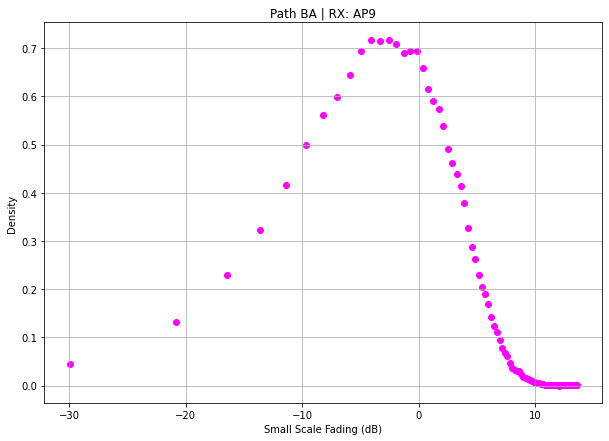

In [78]:
nAP = 'AP9'
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [79]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata)
(11123, 1248)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP9

Best Fitness: 2481.640769542448
Best Gen: 3
Kappa: 1.3052787522536147
Mu: 0.8231952789406591
R_hat: 1.170446396731322
Mt: 5.729221202526515
Elapsed time is 45.27789855003357 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP9

Best Fitness: 345.00803505650185
Best Gen: 199
Kappa: 442.03722242906105
Mu: 0.0032110802199437124
R_hat: 1.0337585866298986
Mt: 6.411436487417738
Elapsed time is 39.88277578353882 seconds.


(11123, 1248)

#### Plots

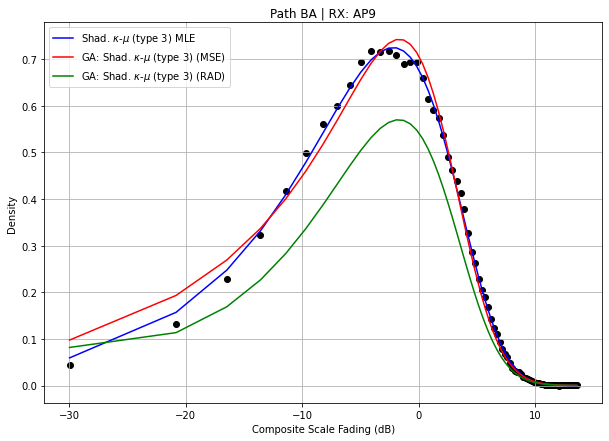

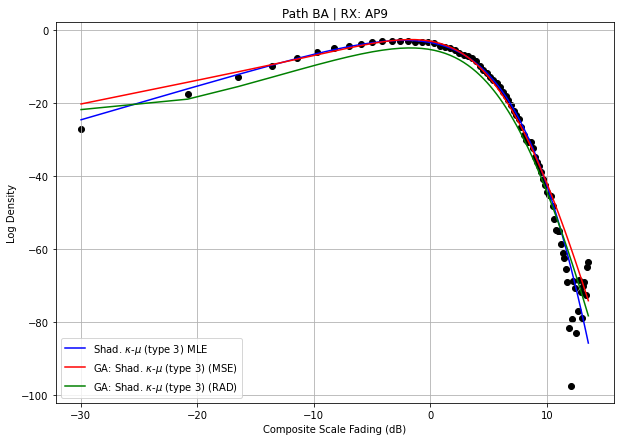

In [80]:
mle_sku_t3_pathBA_ap9 = [0.001, 0.96584, 1.1825, 13.223]
sku_t3_BA_ap9_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathBA_ap9[0], mle_sku_t3_pathBA_ap9[1], mle_sku_t3_pathBA_ap9[2], mle_sku_t3_pathBA_ap9[3]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), sku_t3_BA_ap9_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(sku_t3_BA_ap9_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ (type 3) MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_mse, mu_mse, r_hat_mse, mt_mse)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, kappa_rad, mu_rad, r_hat_rad, mt_rad)), label='GA: Shad. $\kappa$-$\mu$ (type 3) (RAD)', c='green')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Composite Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [81]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

# AIC MLE - SHADOWED KAPPA MU
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, mle_sku_t3_pathBA_ap9[0], mle_sku_t3_pathBA_ap9[1], mle_sku_t3_pathBA_ap9[2], mle_sku_t3_pathBA_ap9[3]).astype(float)))
AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_mse, mu_mse, r_hat_mse, mt_mse).astype(float)))
AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, kappa_rad, mu_rad, r_hat_rad, mt_rad).astype(float)))
AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


rads = {'Methods':['MLE - Shad. KappaMu Type 3', 'GA - Shad. KappaMu Type 3 (Fitness = MSE)',\
                   'GA - Shad. KappaMu Type 3 (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,MLE - Shad. KappaMu Type 3,31345.788165
1,GA - Shad. KappaMu Type 3 (Fitness = MSE),31502.370185
2,GA - Shad. KappaMu Type 3 (Fitness = RAD),42375.081918
